In [43]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
import plottingsystem as pts
benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  C    0.0000000    1.3990430    0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bound = [(0,5)]
carbon_coordinates = pts.taking_carbon_coordinates(benzene_molecule)
print(carbon_coordinates)

benzene_molecule_with_H = gto.M(atom=benzene_molecule, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = [i for i, label in enumerate(benzene_molecule_with_H.ao_labels()) if 'C 2pz' in label]
print(pz_indices)
hf = scf.RHF(benzene_molecule_with_H)
hf_energy = hf.kernel()




[[ 1.2116068  0.6995215  0.       ]
 [ 1.2116068 -0.6995215  0.       ]
 [-0.        -1.399043  -0.       ]
 [-1.2116068 -0.6995215 -0.       ]
 [-1.2116068  0.6995215 -0.       ]
 [ 0.         1.399043   0.       ]]
[4, 9, 14, 19, 24, 29]
converged SCF energy = -227.890280218618


In [44]:
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
print(mo_coeff)
mo_coeff = normaliseer(mo_coeff)


[[ 4.96260e-01 -2.86531e-01  4.05421e-01 ...  8.30820e-02  0.00000e+00
  -5.99520e-02]
 [ 1.45510e-02 -8.40200e-03  9.20600e-03 ... -5.93586e-01 -0.00000e+00
   4.50366e-01]
 [-5.14000e-04 -1.88000e-03  1.34700e-03 ...  1.49408e-01 -3.76586e-01
  -5.83080e-01]
 ...
 [ 3.30800e-03 -1.91000e-03 -2.82100e-03 ... -2.70281e-01 -0.00000e+00
  -2.83563e-01]
 [ 3.30800e-03  1.91000e-03 -2.82100e-03 ... -2.70281e-01  0.00000e+00
   2.83563e-01]
 [ 0.00000e+00  3.82000e-03 -2.82100e-03 ... -0.00000e+00 -0.00000e+00
  -2.83563e-01]]


In [45]:
mo_eigenvalues = hf.mo_energy[[16,19,20,21,22,23]]
print(mo_eigenvalues)
beta = (mo_eigenvalues[0] - mo_eigenvalues[1] + (mo_eigenvalues[1] - mo_eigenvalues[3])/ 2 + mo_eigenvalues[3] - mo_eigenvalues[5]) / 3
print(beta)
pz_orbitals = mo_coeff[pz_indices][:,[16,19,20,21,22,23]]
print(pz_orbitals)

[-0.45373014 -0.27849678 -0.27849677  0.26749316  0.26749316  0.50060729]
-0.22711415405306065
[[ 0.40824829  0.5         0.28867513 -0.2886747   0.50000044  0.40824829]
 [ 0.40824829  0.5        -0.28867513 -0.28867557 -0.49999956 -0.40824829]
 [ 0.40824829  0.         -0.57735027  0.57735027 -0.          0.40824829]
 [ 0.40824829 -0.5        -0.28867513 -0.2886747   0.50000044 -0.40824829]
 [ 0.40824829 -0.5         0.28867513 -0.28867557 -0.49999956  0.40824829]
 [ 0.40824829 -0.          0.57735027  0.57735027 -0.         -0.40824829]]


In [46]:
number_of_electrons = 6
D = np.zeros((6,6))
print(D)
elec_to_place = number_of_electrons
print()
for i in range(6):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((pz_orbitals[:,i]).reshape(-1,1) @ (pz_orbitals[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
print(D.round(6))
print(np.diag(D))
eval, eigv = np.linalg.eigh(D)
print(eval,eigv)
    

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[ 1.        0.666667  0.       -0.333333  0.        0.666667]
 [ 0.666667  1.        0.666667  0.       -0.333333  0.      ]
 [ 0.        0.666667  1.        0.666667  0.       -0.333333]
 [-0.333333  0.        0.666667  1.        0.666667  0.      ]
 [ 0.       -0.333333  0.        0.666667  1.        0.666667]
 [ 0.666667  0.       -0.333333  0.        0.666667  1.      ]]
[1. 1. 1. 1. 1. 1.]
[-2.48688595e-16  1.23184458e-16  4.58571044e-16  2.00000000e+00
  2.00000000e+00  2.00000000e+00] [[ 1.39453823e-01  4.06453122e-02 -6.92026437e-01  7.45293731e-17
   7.07106781e-01 -6.10468748e-17]
 [-1.08644558e-01 -5.52809362e-01  4.27315070e-01 -5.21749195e-01
   4.71404521e-01  7.45355992e-02]
 [ 3.28684690e-01  6.17622879e-01  1.02510262e-01 -5.81377674e-01
   0.00000000e+00  4.02492236e-01]
 [-5.79534086e-01 -1.70272346e-01 -3.67624225e-01 -1.19256959e-01
  -2.

In [47]:
def plotting_of_D(number_of_atoms, D):
    transposed_eigenvectors = np.diag(D)

    # Maak de plot voor de benzeenring
    plt.figure(figsize=(5, 5), dpi=400)
    _x = np.cos(2 * np.pi / number_of_atoms * np.arange(number_of_atoms))
    _y = np.sin(2 * np.pi / number_of_atoms * np.arange(number_of_atoms))
    plt.plot(_x, _y, linestyle='-', color='grey')
    plt.plot([_x[-1], _x[0]], [_y[-1], _y[0]], linestyle='-', color='grey')

    # Plot de atoomcoëfficiënten als gekleurde bollen
    for j in range(number_of_atoms):
        c = transposed_eigenvectors[j]  # Alleen de eerste eigenvector gebruiken

        if c > 0:
            color = 'blue'
        else:
            color = 'red'

        size = abs(c) * 4000  # Schaal de grootte van de bol op basis van de coëfficiënt
        plt.scatter(_x[j], _y[j], s=size, marker='o', color=color, zorder=2)
        # Toon de coëfficiënt in de bol
        if c.round(4) != 0:
            plt.text(_x[j], _y[j], f'{c:.2f}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')

    plt.title(f'Electron population on atoms')
    
    plt.gca().margins(0.3)
    plt.gca().axis('off')
    

    # Toon de plot
    plt.show()


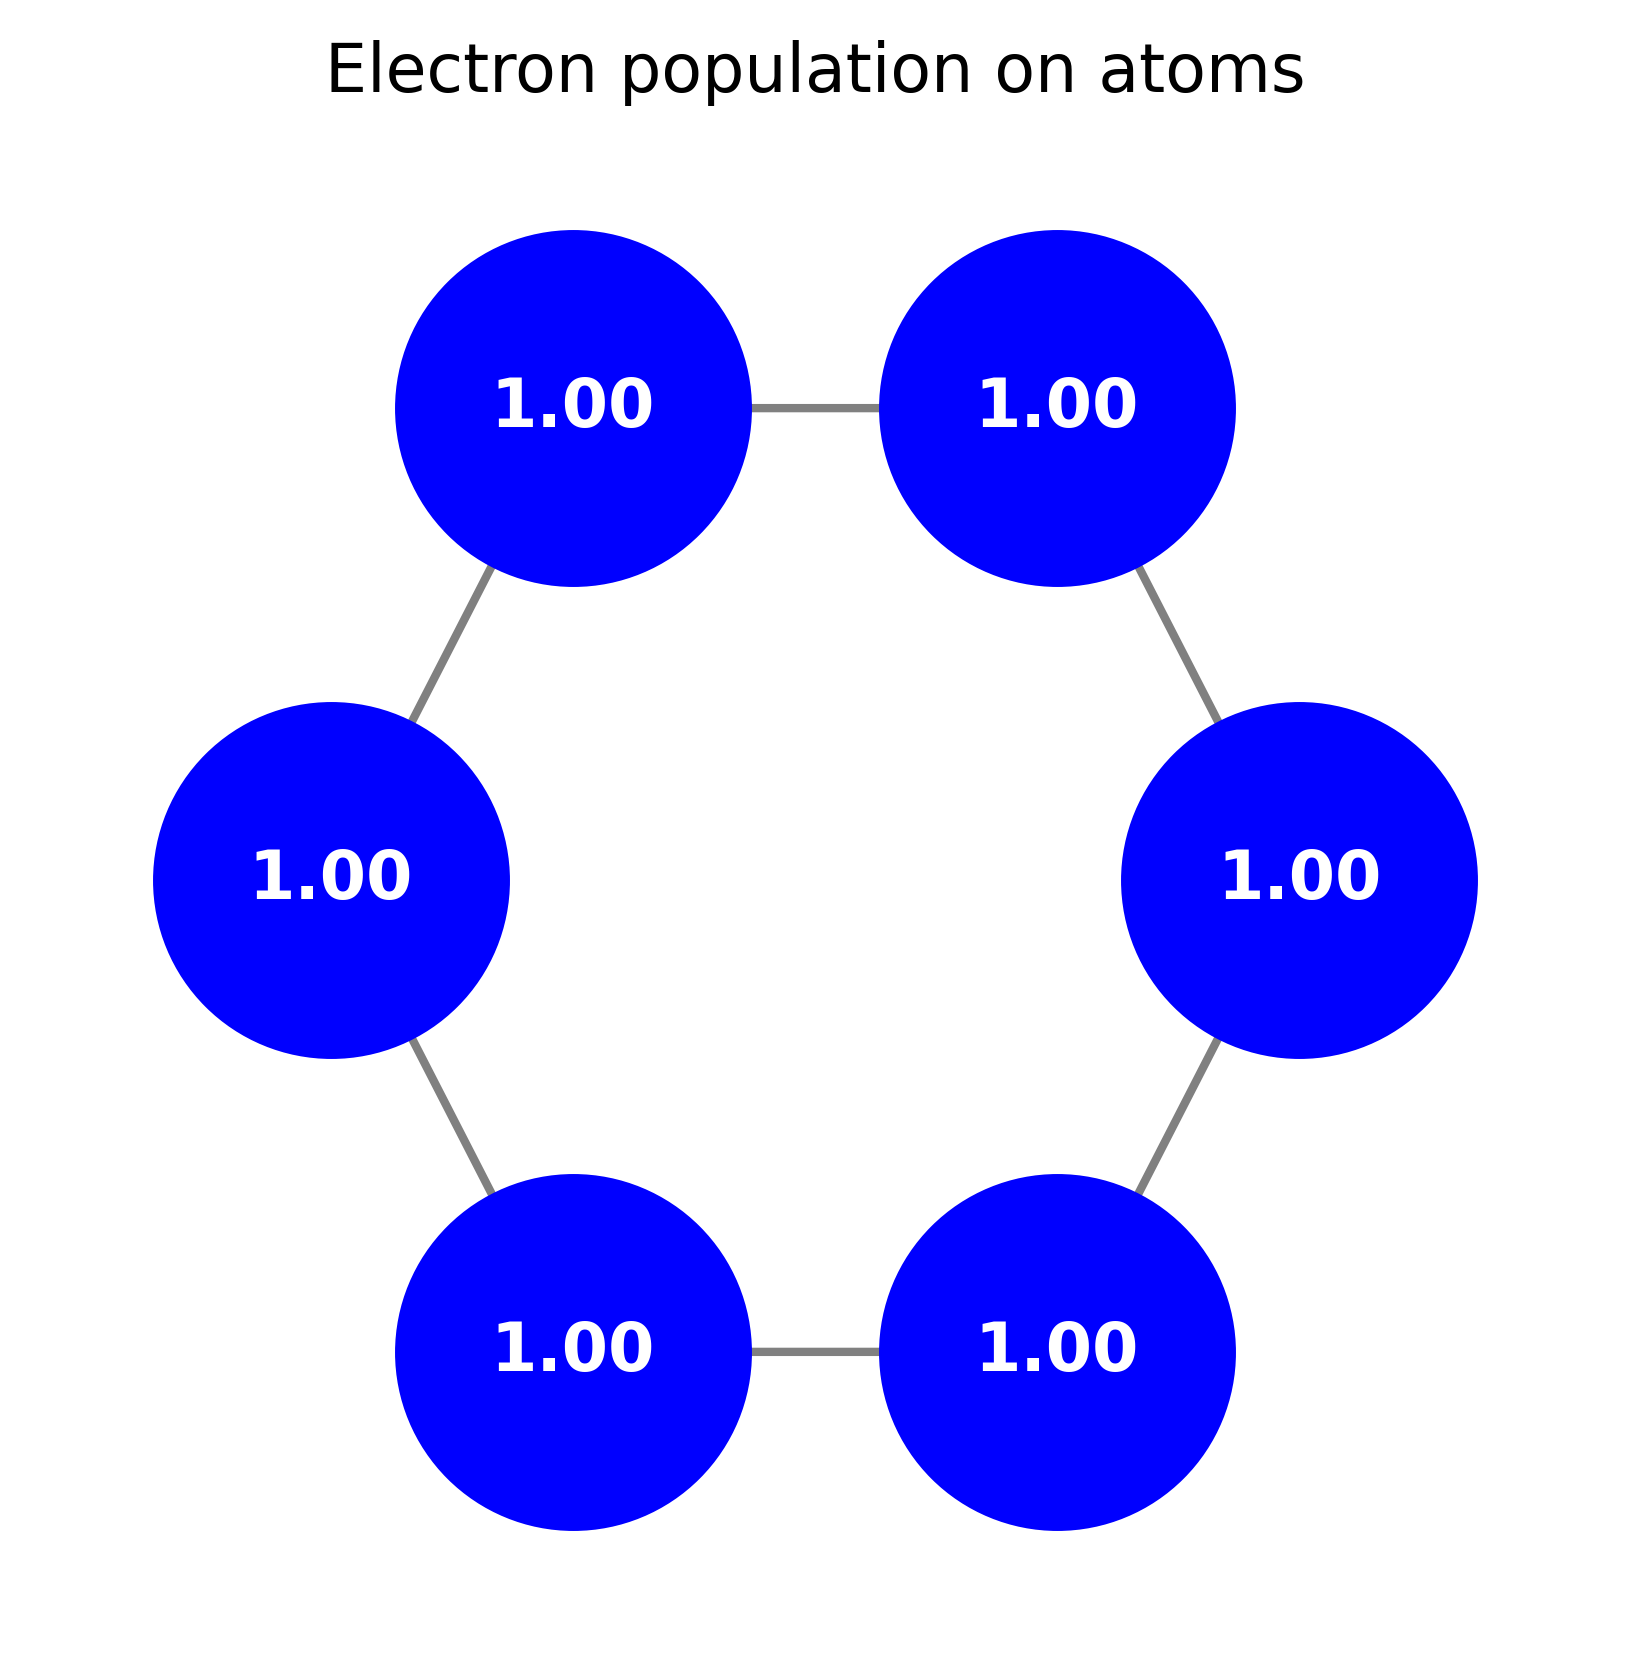

In [48]:
plotting_of_D(6,D)

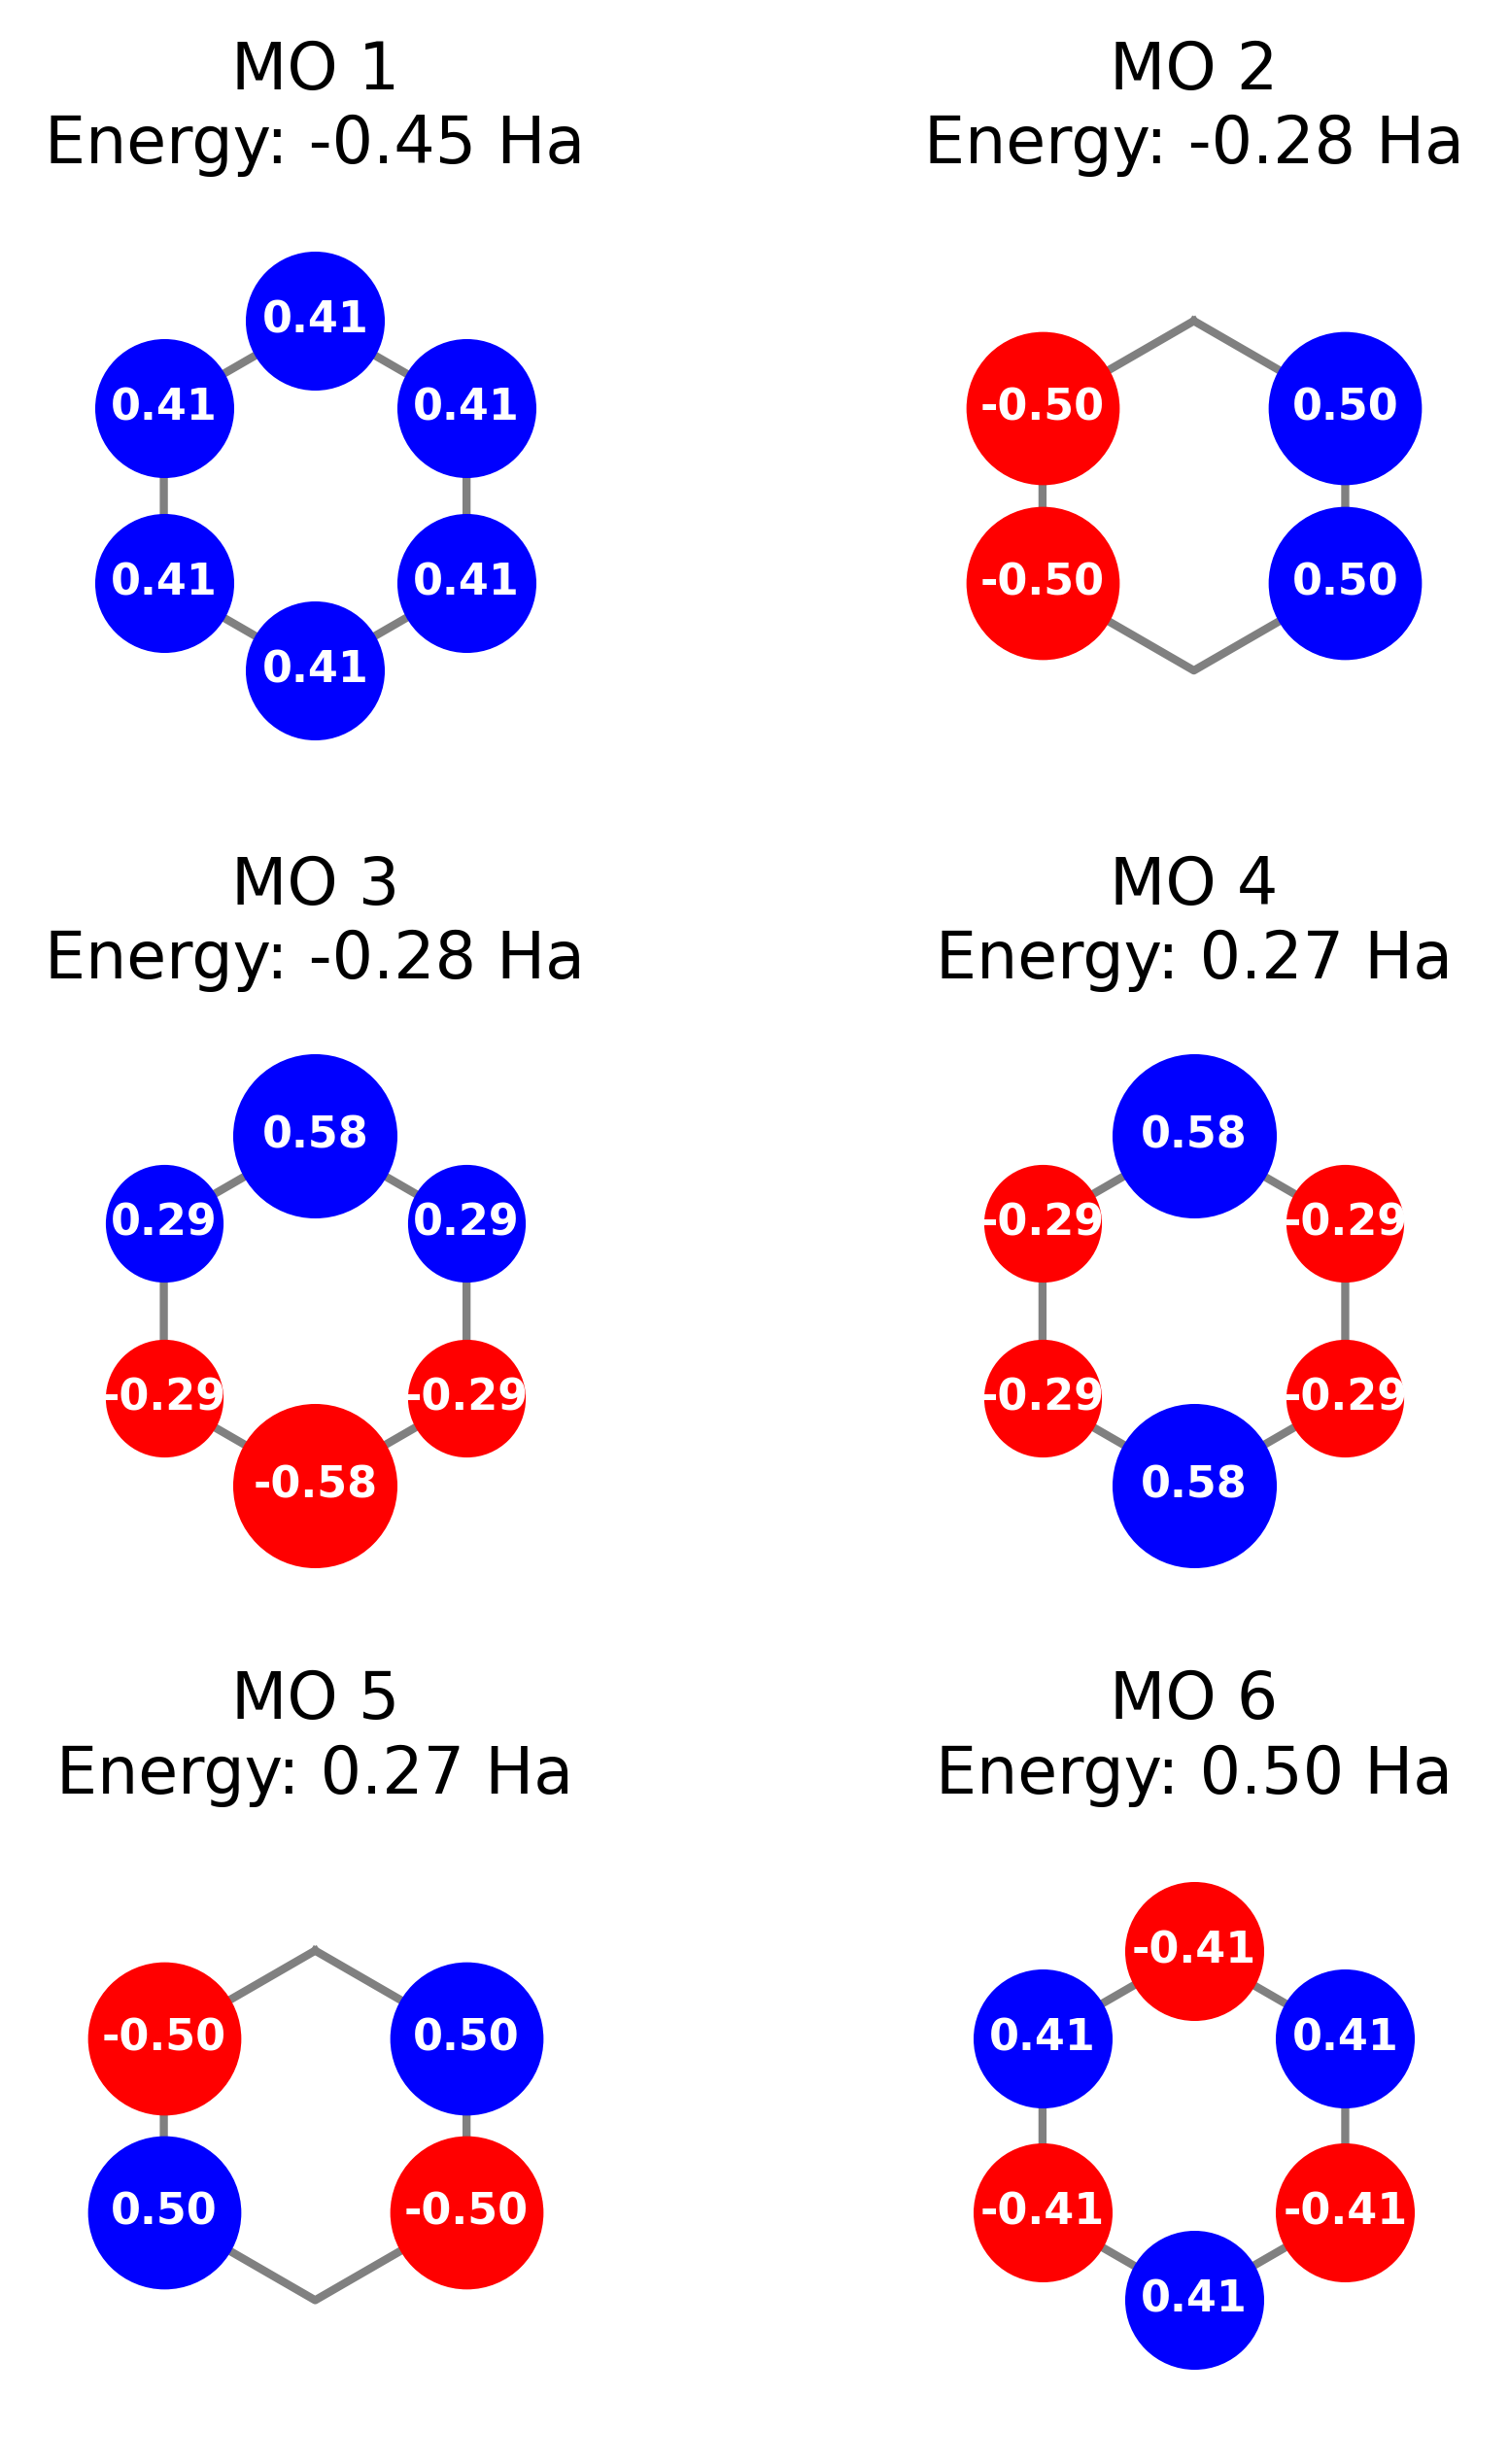

In [51]:
pts.plot_MOs(mo_eigenvalues, pz_orbitals, carbon_coordinates, extra_bound, fig_size = (5,7), unit='Ha')

In [ ]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
Benzene = huckel(6, -0, -3)
Benzene.create_matrix()

huc_mat = Benzene.huckel_matrix
print(huc_mat)

[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]


In [ ]:
Benzene.solve_huckel_matrix()
eigval = Benzene.eigenvalues
eigvec = Benzene.eigenvectors

eigvec = np.concatenate((eigvec[-1:], eigvec[:-1]))
eigvec = np.concatenate((eigvec[-1:], eigvec[:-1]))
for i in [3, 4]:
    eigvec[:, i] = -eigvec[:, i]
print(eigvec)

[[ 4.08248097e-01  2.88675203e-01  5.00000119e-01 -2.88675203e-01
   5.00000119e-01  4.08248097e-01]
 [ 4.08248097e-01 -2.88675203e-01  5.00000119e-01 -2.88675203e-01
  -5.00000119e-01 -4.08248097e-01]
 [ 4.08248097e-01 -5.77350406e-01  0.00000000e+00  5.77350406e-01
  -2.18901375e-17  4.08248097e-01]
 [ 4.08248097e-01 -2.88675203e-01 -5.00000119e-01 -2.88675203e-01
   5.00000119e-01 -4.08248097e-01]
 [ 4.08248097e-01  2.88675203e-01 -5.00000119e-01 -2.88675203e-01
  -5.00000119e-01  4.08248097e-01]
 [ 4.08248097e-01  5.77350406e-01 -4.35210020e-18  5.77350406e-01
   2.77793050e-18 -4.08248097e-01]]


In [ ]:
number_of_electrons = 6
D = np.zeros((6,6))
print(D)
elec_to_place = number_of_electrons
print()
for i in range(6):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((eigvec[:,i]).reshape(-1,1) @ (eigvec[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
print(D.round(6))
print(np.diag(D))
    

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[ 1.        0.666667 -0.       -0.333334 -0.        0.666667]
 [ 0.666667  1.        0.666667 -0.       -0.333334 -0.      ]
 [-0.        0.666667  1.        0.666667 -0.       -0.333334]
 [-0.333334 -0.        0.666667  1.        0.666667 -0.      ]
 [-0.       -0.333334 -0.        0.666667  1.        0.666667]
 [ 0.666667 -0.       -0.333334 -0.        0.666667  1.      ]]
[1. 1. 1. 1. 1. 1.]


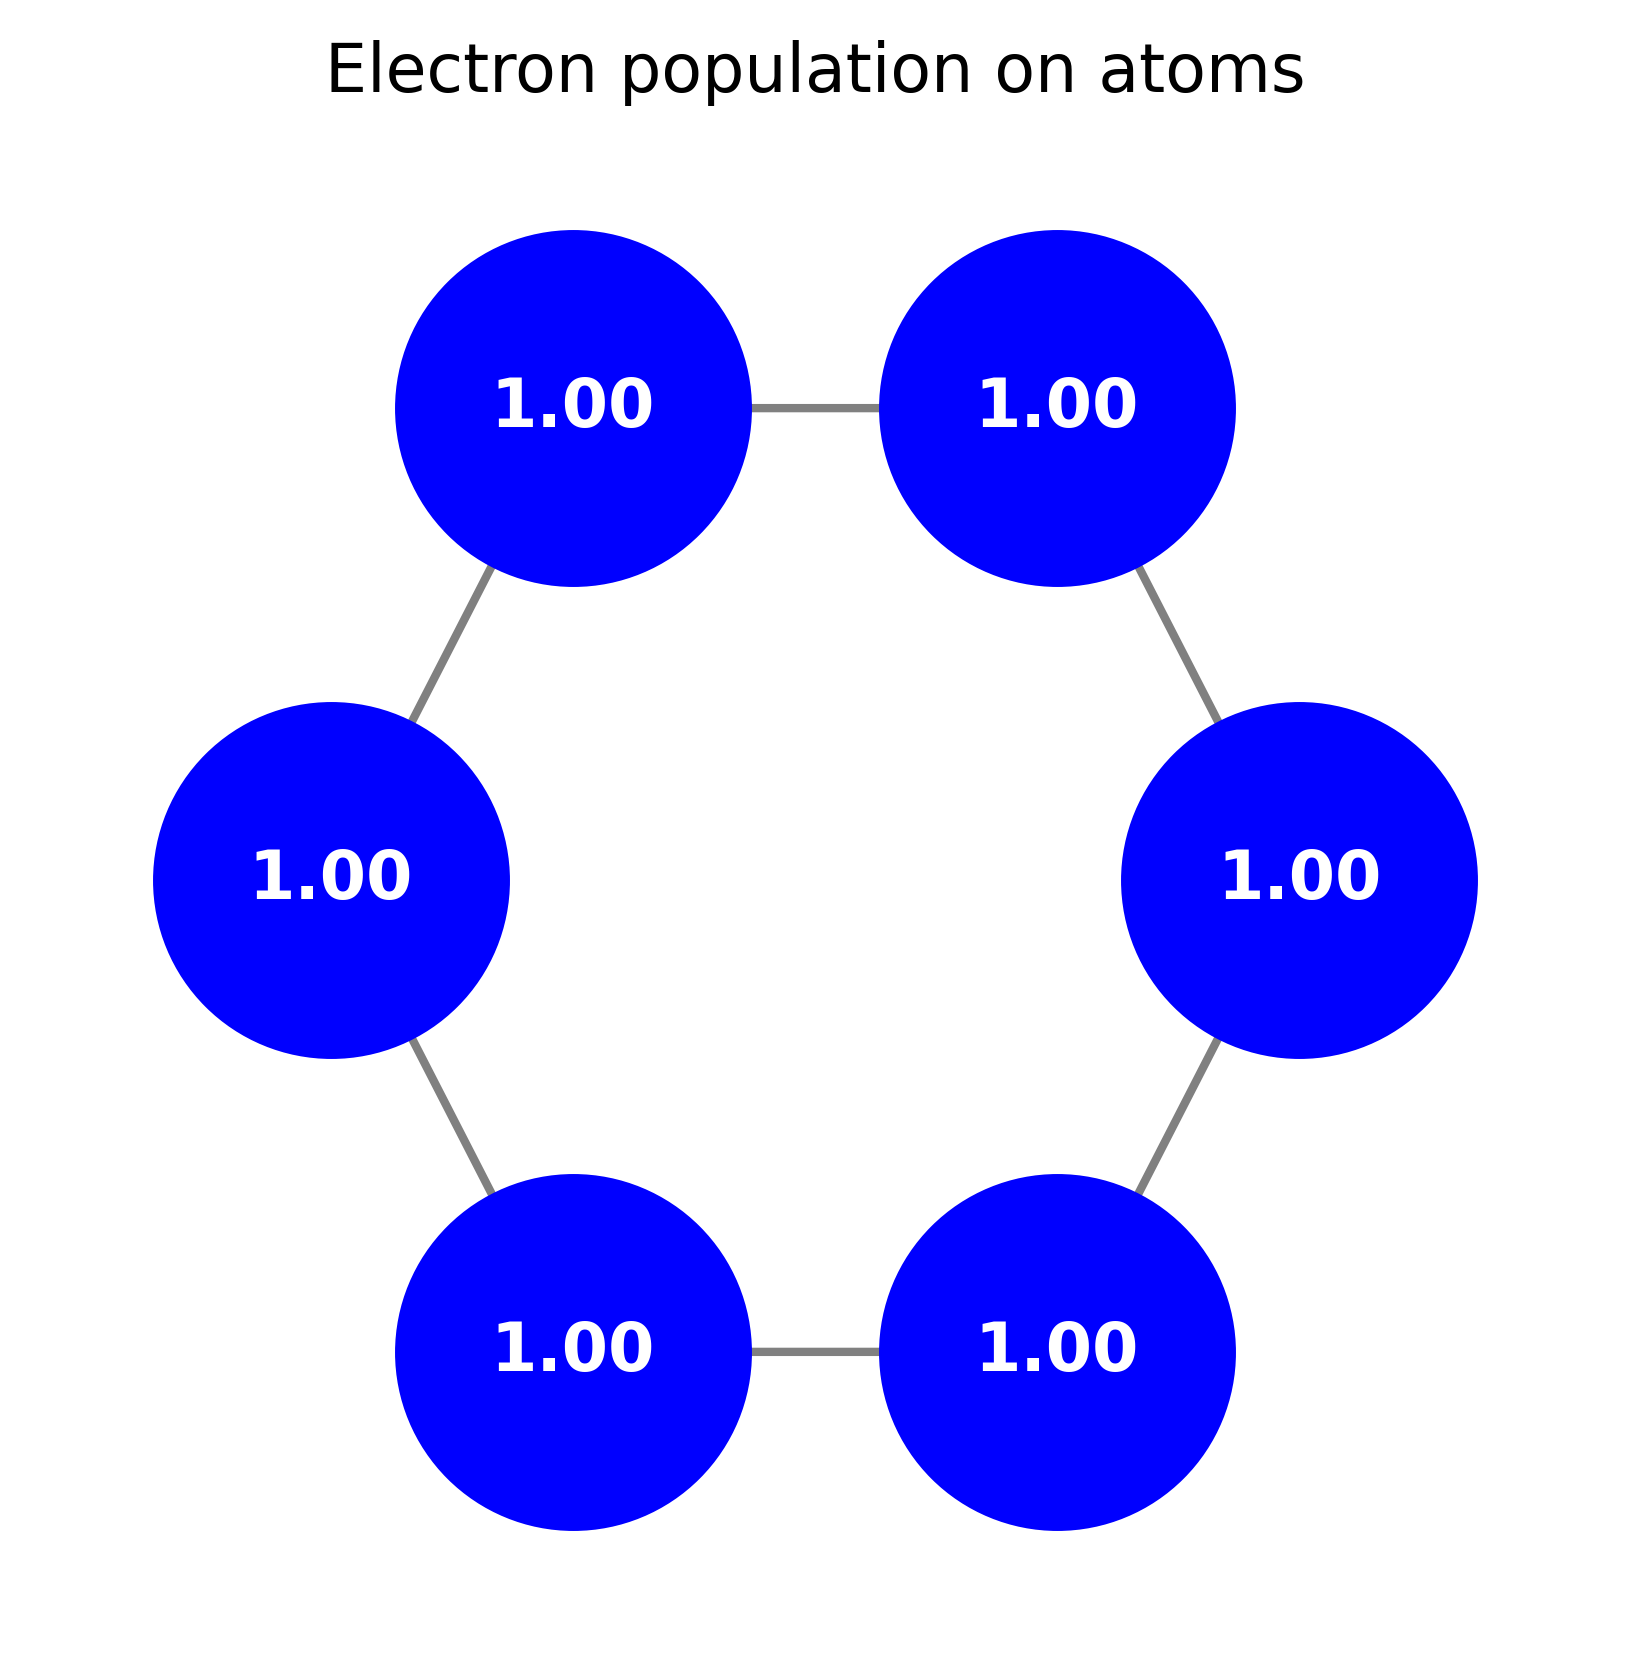

In [ ]:
plotting_of_D(6,D)

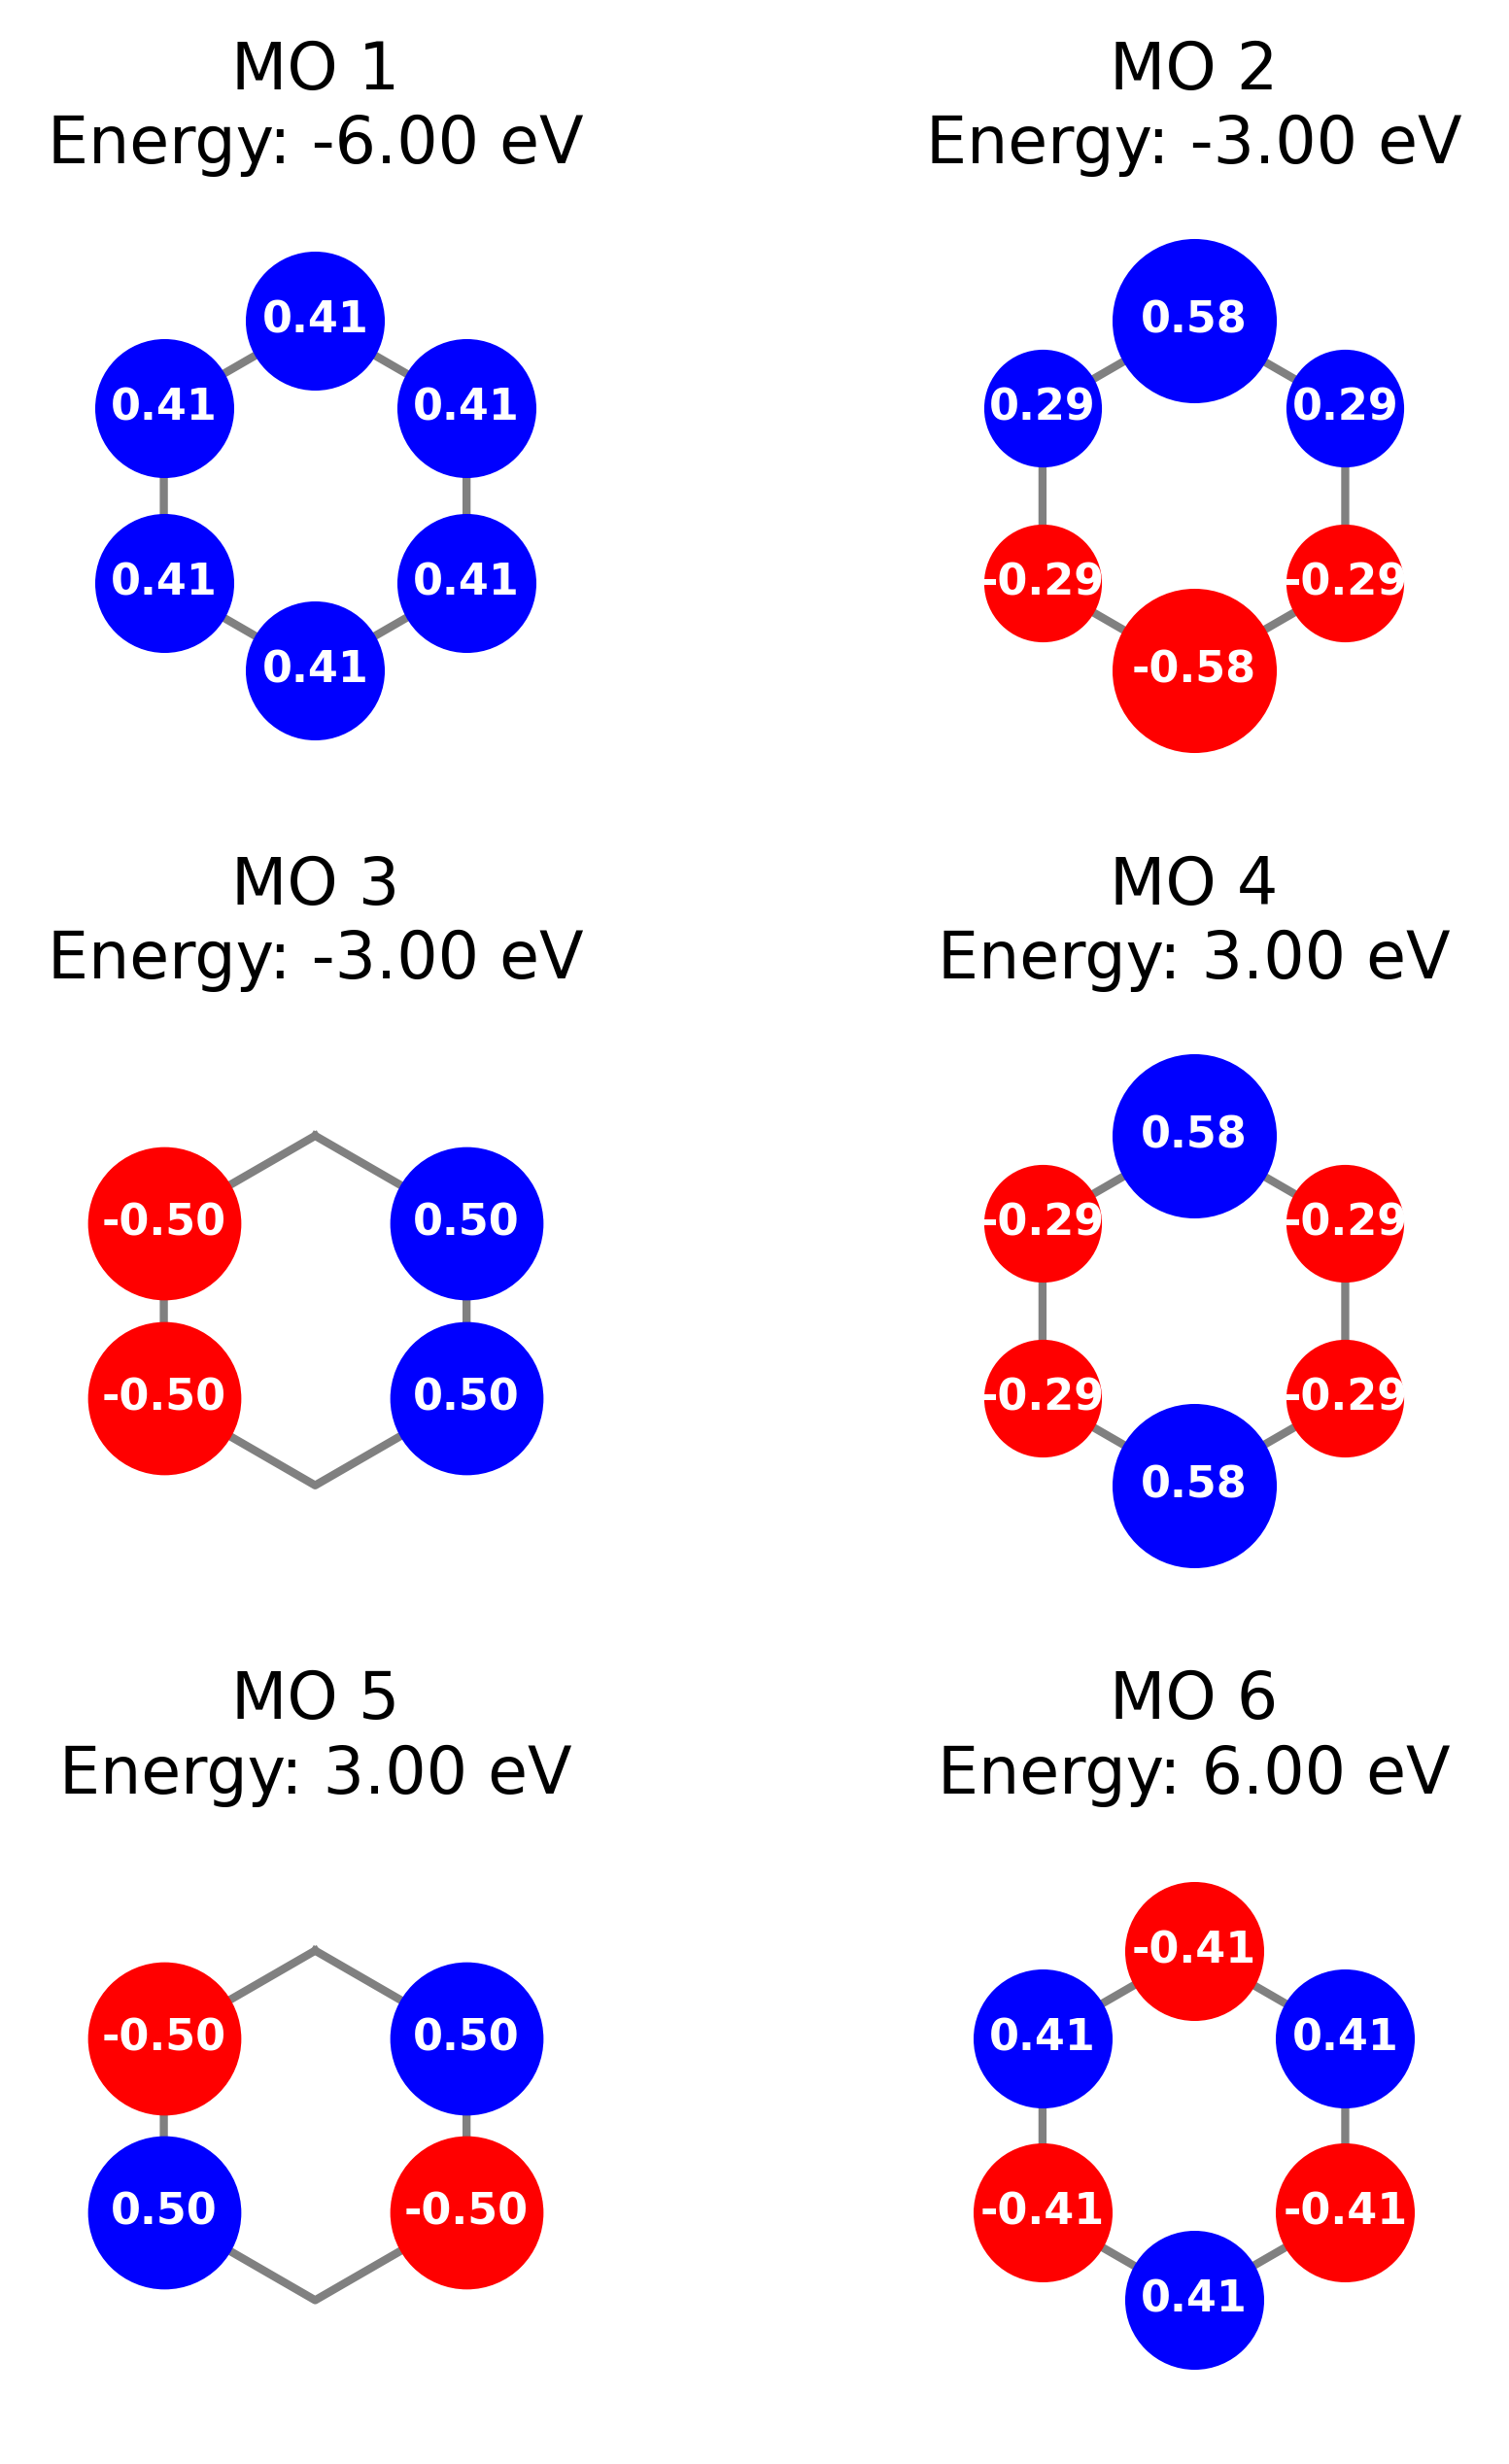

In [ ]:
pts.plot_MOs(eigval, eigvec, carbon_coordinates,extra_bound, 'Benzene', 'Hückel', fig_size= (5,7))